In [168]:
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import label, generate_binary_structure

In [169]:
import cv2 as cv

In [170]:
masks_images = [x for x in os.listdir("../data/masks_aggregate")]

# Классификация предиктов масок легких по легким

In [171]:
for j in masks_images:
    mask_array = plt.imread(os.path.join("../data/masks_aggregate", j))
    pattern = generate_binary_structure(2, 2)
    labeled_array, num_features = label(mask_array, structure=pattern)
    size_area = []
    res = np.zeros_like(labeled_array)
    if num_features > 1:
        for i in range(1,num_features+1):
            size_area.append(len(np.where(labeled_array == i)[0]))
        lung_first = size_area.index(sorted(size_area)[-1]) + 1
        lung_second = size_area.index(sorted(size_area)[-2]) + 1 
        x1, x2 = np.where(labeled_array == lung_first)
        y1, y2 = np.where(labeled_array == lung_second)
        if x2.min() < y2.min():
            res[x1,x2] = 1
            res[y1,y2] = 2
        else:
            res[x1,x2] = 2
            res[y1,y2] = 1

    elif num_features == 1:
        x1, x2 = np.where(labeled_array == 1)
        if x2.min() < 512:
            res[x1,x2] = 1
        else:
            res[x1,x2] = 2

    cv.imwrite('../data/masks012/' + j, res)
    


# Очистка по трешхолду

In [172]:
for j in masks_images:
    arr = cv.imread(os.path.join("../data/masks012/", j))[...,0]
    for i in (np.unique(arr)[1:]):
        x, y = np.where(arr == i)
        if len(x) < 9500:
            arr[x,y] = 0
    cv.imwrite('../data/masks012/' + j, arr)
#     plt.imshow(arr)


# Замена отсутствующих легких на их среднее по датасету (поиск средних)

In [173]:
left_average_lung = np.zeros((1024,1024))
for j in masks_images:
    arr = cv.imread(os.path.join("../data/masks012/", j))[...,0]
    tmp_mask = np.zeros((1024,1024))
    tmp_mask[np.where(arr == 1)] = 1
    left_average_lung += tmp_mask

right_average_lung = np.zeros((1024,1024))
for j in masks_images:
    arr = cv.imread(os.path.join("../data/masks012/", j))[...,0]
    tmp_mask = np.zeros((1024,1024))
    tmp_mask[np.where(arr == 2)] = 1
    right_average_lung += tmp_mask



# otrisovka average mask

True

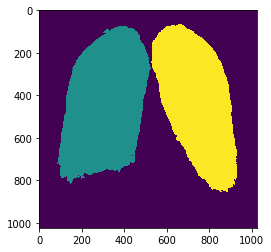

In [174]:
final_mask = np.zeros((1024,1024))
final_mask[np.where(left_average_lung > 10)] = 1
final_mask[np.where(right_average_lung > 10)] = 2
plt.imshow(final_mask)
cv.imwrite('../data/masks012/' + 'average_mask.png', final_mask)

# Восставление недостающего легкого

In [175]:
for j in masks_images:
    arr = cv.imread(os.path.join("../data/masks012/", j))[...,0]
    if 1 not in np.unique(arr):
        arr[np.where(left_average_lung > 10)] = 1
        cv.imwrite('../data/masks012/' + j, arr)
    if 2 not in np.unique(arr):
        arr[np.where(right_average_lung > 10)] = 2
        cv.imwrite('../data/masks012/' + j, arr)
        

# Разные трешхолды

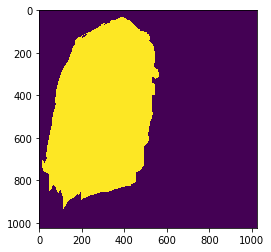

In [150]:
plt.imshow(np.where(left_average_lung > 1, 1, 0))

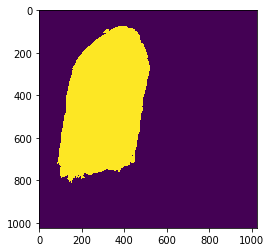

In [151]:
plt.imshow(np.where(left_average_lung > 10, 1, 0))

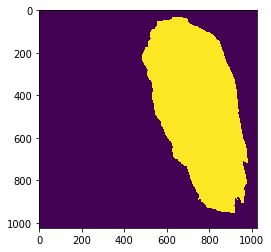

In [144]:
plt.imshow(np.where(right_average_lung > 1, 1, 0))

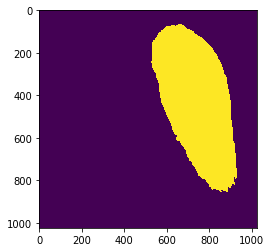

In [152]:
plt.imshow(np.where(right_average_lung > 10, 1, 0))